<a href="https://colab.research.google.com/github/Morgoth636/ML_WS22-23/blob/main/Bank-Note%20%26%20Wine%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banknote Dataset: Support Vector Machine/Binary Classification


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

Loading the dataset form Git Hub

In [ ]:
url = "https://raw.githubusercontent.com/Morgoth636/ML_WS22-23/main/BankNote_Authentication.csv"
df = pd.read_csv(url)


The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

1) Variance of Wavelet Transformed image (continuous).

2) Skewness of Wavelet Transformed image (continuous).

3) Kurtosis of Wavelet Transformed image (continuous).

4) Entropy of image (continuous).

5) Class (0 for authentic, 1 for inauthentic).

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Splitting the dataset in train data and test data with 20% test data and 80% training data

In [ ]:
y = df["class"]
X = df.loc[:, df.columns != "class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Setting up the classifier model and fitting the model to the training data...

In [ ]:
from sklearn import metrics
clf = SVC(gamma = "auto")
clf.fit(X_train, y_train)

SVC(gamma='auto')

Predicting on the test dataset

In [ ]:
y_pred = clf.predict(X_test)

Creating and plotting the confusion matrix for the classifier

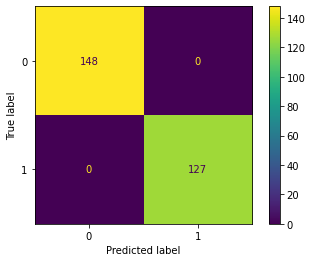

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('\n')
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('\n')
print('F1: %.3f' % f1_score(y_test, y_pred))
print('\n')
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 1.000


Recall: 1.000


F1: 1.000


Accuracy: 1.000


#Wine Dataset: Multi Layer Perceptron/Multiclass Classification

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, scale
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

Create Neurtal Network layout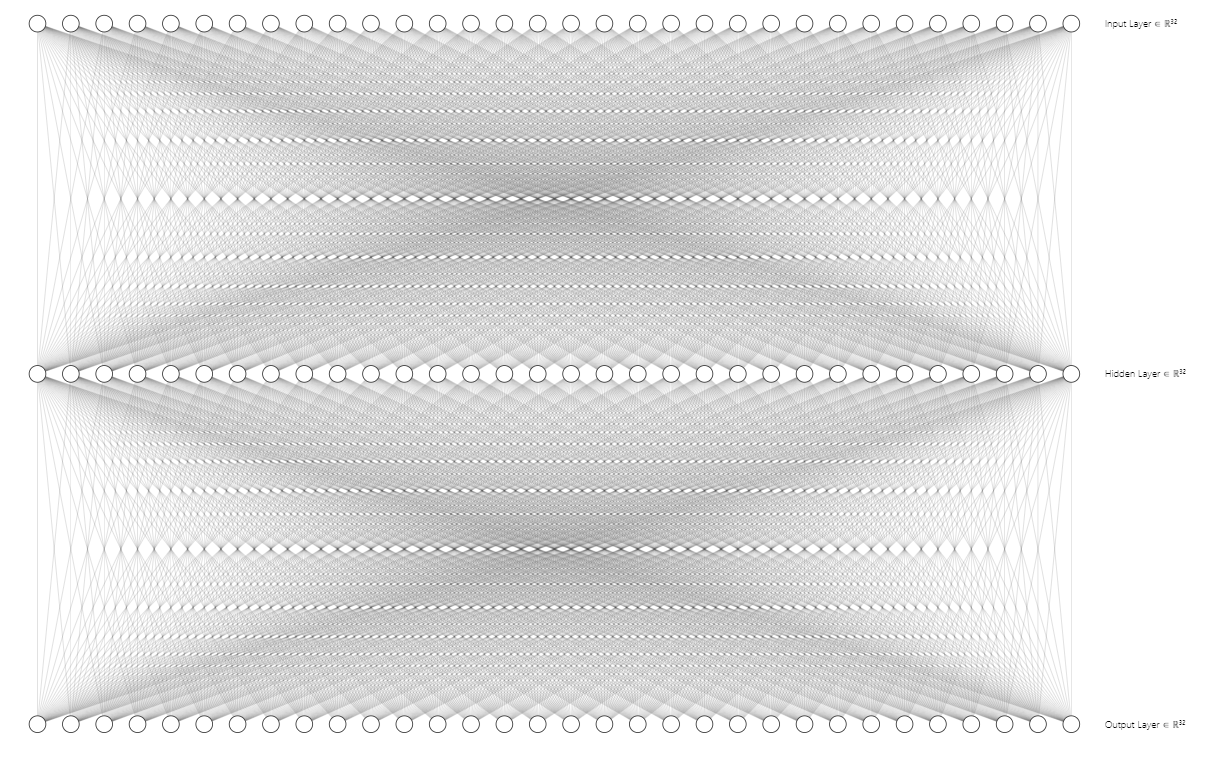

In [23]:
model = Sequential()
model.add(Dense(32, input_dim=11, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(11, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer= Adam(learning_rate=1e-3), metrics = ["accuracy"])


Set up for changing dataset 

In [27]:
def load_dataset(red):
  if red:
    url = "https://raw.githubusercontent.com/Morgoth636/ML_WS22-23/main/winequality-red.csv"
    df = pd.read_csv(url)
    y = df["quality"]
    X = df.loc[:, df.columns != "quality"]
    X = scale(X)
    return X, y, df
  else:
    url = "https://raw.githubusercontent.com/Morgoth636/ML_WS22-23/main/winequality-white.csv"
    df = pd.read_csv( url, sep = ";")
    y = df["quality"]
    X = df.loc[:, df.columns != "quality"]
    X = scale(X)
    return X, y, df
    

The Wine Quality Dataset involves predicting the quality of white wines on a scale given chemical measures of each wine.

It is a multi-class classification problem, but could also be framed as a regression problem. The number of observations for each class is not balanced. There are 4,898 observations with 11 input variables and one output variable. The variable names are as follows:



1.   Fixed acidity
2.   Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
12. Quality (score between 0 and 10)





In [30]:
_,_,df = load_dataset(red = True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


loading and dividing dataset in training 80% and testing 20%

if red = true load red wine dataset

if red = false loading white wine dataset

predictingon test dataset

In [26]:
X, y, _ = load_dataset(red=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=11)
y_test = to_categorical(y_test, num_classes=11)
model.fit(X_train, y_train, epochs=200)
  

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 2.1189 - accuracy: 0.2932
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 1.5363 - accuracy: 0.4777
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2894 - accuracy: 0.5051
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 1.2243 - accuracy: 0.5324
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 1.1705 - accuracy: 0.5418
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 1.1700 - accuracy: 0.5395
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 1.1374 - accuracy: 0.5512
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 1.1120 - accuracy: 0.5418
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 1.0670 - accuracy: 0.5622
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 1.0614 - accuracy: 0.5895
Epoch 11/

Evatuating accuracy

In [ ]:
results = model.evaluate(X_test, y_test)


10/10 [==============================] - 0s 2ms/step - loss: 0.8508 - accuracy: 0.6125
